# US Top Tracks by Genre, Artist, and Region on Spotify!
#### By Sophia Ray and Greg Laursen

In [55]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [56]:
from spotify_secret import secret

In [57]:
cid = '42260a29597e4ccaae16231626f73ce8'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [58]:
playlist_link = "https://open.spotify.com/playlist/3aTYOIaiU9lsysHRCMppEU?si=QYThke-KQke898Y28mpdQw"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]

In [59]:
def get_all_playlist_tracks(playlist_URI):
    results = sp.playlist_tracks(playlist_URI, limit=100)
    tracks = results['items']
    
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    
    return tracks

In [60]:
playlist_dict = {'track_uri': list(),
                'track_name': list(),
                'artist_name': list(),
                'album': list(),
                'track_pop': list()}

In [61]:
billboard_playlist = get_all_playlist_tracks(playlist_URI)

for track_item in billboard_playlist:
    track = track_item["track"]
    track_uri = track.get("uri", "Unknown Track URI")
        
    track_name = track.get("name", "Unknown Track Name")
        
    artist = track["artists"][0] if track["artists"] else {"uri": "Unknown Artist URI", "name": "Unknown Artist Name"}
    artist_name = artist.get("name", "Unknown Artist Name")
        
    album = track.get("album", {}).get("name", "Unknown Album Name")
    track_pop = track.get("popularity", 0)
    
    playlist_dict['track_uri'].append(track_uri)
    playlist_dict['track_name'].append(track_name)
    playlist_dict['artist_name'].append(artist_name)
    playlist_dict['album'].append(album)
    playlist_dict['track_pop'].append(track_pop)

playlist_dict

{'track_uri': ['spotify:track:5dae01pKNjRQtgOeAkFzPY',
  'spotify:track:6XzXeNu7FuUttdTwVl0rG1',
  'spotify:track:33FdwvfiSBRbE2AQ4UehaR',
  'spotify:track:4yDNxMcQCjnCg9lLoKAH0I',
  'spotify:track:5uEwpyOYHFGqme4WnVQhfs',
  'spotify:track:4uq2Zctom8rlXuL3Omm77g',
  'spotify:track:7hHOmImd35ZdKovBNSQXk8',
  'spotify:track:2dQ6cleOtvk3iGjCRMlInT',
  'spotify:track:17wEjjWqgu0HlSbb57zrOl',
  'spotify:track:6LkJcX34c0lPCNfHXZiVVo',
  'spotify:track:1M4oXWd93RwPzt6Ns9h1Nc',
  'spotify:track:4cebVIEpo3f2Pks50fATbc',
  'spotify:track:0BHroBUvBAp561BYqC9LRK',
  'spotify:track:18OOWYpby2ZvjBGokvInzp',
  'spotify:track:1v52YkW75eN4RJ2EyDdQVI',
  'spotify:track:19vjeNqhgk0vhH5TuxDok9',
  'spotify:track:2G597vEgxsvckPwocEHY9Y',
  'spotify:track:7z03paoXvhCzN22twdfPHR',
  'spotify:track:11I6S3cRw3rQiToU1uYjVZ',
  'spotify:track:6SHADtq8nTZCUTjyP7HJqf',
  'spotify:track:4lh2f3aeRv0GcTUwP4Ydi1',
  'spotify:track:75dwXgnlK10c8YtvUODVbj',
  'spotify:track:28IBsttOK2aG9Cb4QtqhMr',
  'spotify:track:4Gx5

In [62]:
import pandas as pd
billboard_df = pd.DataFrame(playlist_dict)

billboard_df.head()

,track_uri,track_name,artist_name,album,track_pop
0,spotify:track:5dae01pKNjRQtgOeAkFzPY,Mona Lisa,Nat King Cole,Unforgettable,54
1,spotify:track:6XzXeNu7FuUttdTwVl0rG1,The Third Man: The Third Man Theme (The Third ...,Anton Karas,Classical Music: 50 of the Best Film Classics,27
2,spotify:track:33FdwvfiSBRbE2AQ4UehaR,Play A Simple Melody - Single Version,Gary Crosby & Friend,Bing-His Legendary Years 1931-1957,7
3,spotify:track:4yDNxMcQCjnCg9lLoKAH0I,(Put Another Nickel In) Music! Music! Music!,Teresa Brewer,A Sweet Old-Fashioned Girl,0
4,spotify:track:5uEwpyOYHFGqme4WnVQhfs,The Third Man Theme,Guy Lombardo,Guy Lombardo On Planet Swing,4


In [63]:
def get_all_playlist_tracks_uris(playlist_URI):
    results = sp.playlist_tracks(playlist_URI, limit=100)
    tracks = results['items']
    
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    
    track_uris = [track['track']['uri'] for track in tracks]
    
    return track_uris

all_track_uris = get_all_playlist_tracks_uris(playlist_URI)

In [ ]:
## trends over time in terms of genre popularity
## having issues gettting the api to cooperate!


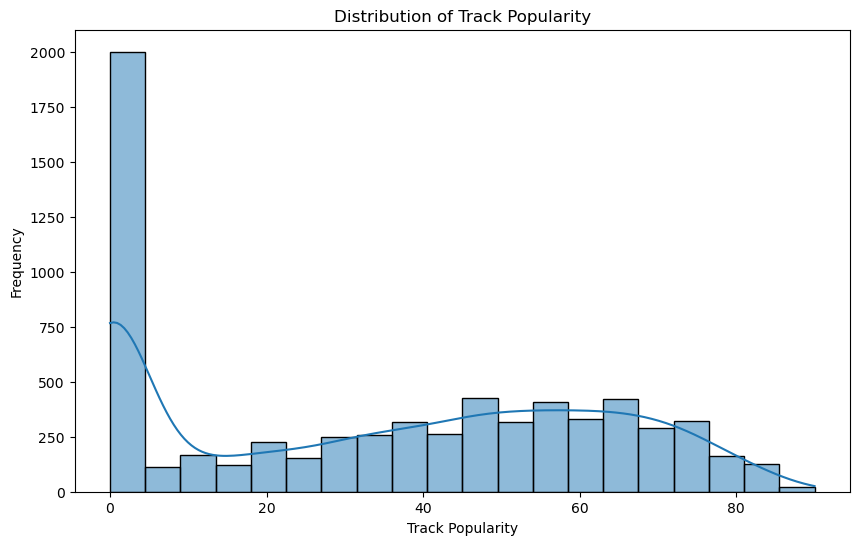

KeyError: 'artist_pop'

<Figure size 1000x600 with 0 Axes>

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(billboard_df['track_pop'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(billboard_df['artist_pop'], bins=20, kde=True)
plt.title('Distribution of Artist Popularity')
plt.xlabel('Artist Popularity')
plt.ylabel('Frequency')
plt.show()

In [65]:
tracks_df = billboard_df.copy()


import pandas as pd

def get_all_audio_features_from_dataframe(tracks_df):
    # Extract track IDs from the 'track_uri' column
    tracks_df['track_id'] = tracks_df['track_uri'].str.split(':').str[-1]

    # Function to fetch audio features in batches
    def fetch_audio_features(track_ids):
        audio_features = []
        for i in range(0, len(track_ids), 100):  # Process 100 IDs at a time
            batch = track_ids[i:i+100]
            features = sp.audio_features(batch)
            # Filter out None values
            audio_features.extend([f for f in features if f is not None])
        return audio_features

    # Fetch the audio features
    track_ids = tracks_df['track_id'].tolist()
    audio_features = fetch_audio_features(track_ids)

    # Check if audio_features is empty
    if not audio_features:
        raise ValueError("No audio features were returned. Check the track IDs or API limits.")

    # Create a DataFrame from the audio features
    features_df = pd.DataFrame(audio_features)

    # Merge audio features back into the original DataFrame
    enriched_df = pd.merge(tracks_df, features_df, left_on='track_id', right_on='id', how='left')

    # Drop the temporary 'track_id' and redundant 'id' columns
    enriched_df = enriched_df.drop(columns=['track_id', 'id'])

    return enriched_df



enriched_tracks_data = get_all_audio_features_from_dataframe(tracks_df)


# Print the enriched DataFrame
print(enriched_tracks_data)



                                 track_uri  \
0     spotify:track:5dae01pKNjRQtgOeAkFzPY   
1     spotify:track:6XzXeNu7FuUttdTwVl0rG1   
2     spotify:track:33FdwvfiSBRbE2AQ4UehaR   
3     spotify:track:4yDNxMcQCjnCg9lLoKAH0I   
4     spotify:track:5uEwpyOYHFGqme4WnVQhfs   
...                                    ...   
6926  spotify:track:7vQbuQcyTflfCIOu3Uzzya   
6927  spotify:track:7vQbuQcyTflfCIOu3Uzzya   
6928  spotify:track:77khP2fIVhSW23NwxrRluh   
6929  spotify:track:77khP2fIVhSW23NwxrRluh   
6930  spotify:track:7cv28LXcjAC3GsXbUvXKbX   

                                             track_name           artist_name  \
0                                             Mona Lisa         Nat King Cole   
1     The Third Man: The Third Man Theme (The Third ...           Anton Karas   
2                 Play A Simple Melody - Single Version  Gary Crosby & Friend   
3          (Put Another Nickel In) Music! Music! Music!         Teresa Brewer   
4                                   The Th

In [70]:
updated_tracks_df = get_release_dates(enriched_tracks_data, sp)

# Print the updated DataFrame
print(updated_tracks_df)

                                 track_uri  \
0     spotify:track:5dae01pKNjRQtgOeAkFzPY   
1     spotify:track:6XzXeNu7FuUttdTwVl0rG1   
2     spotify:track:33FdwvfiSBRbE2AQ4UehaR   
3     spotify:track:4yDNxMcQCjnCg9lLoKAH0I   
4     spotify:track:5uEwpyOYHFGqme4WnVQhfs   
...                                    ...   
6926  spotify:track:7vQbuQcyTflfCIOu3Uzzya   
6927  spotify:track:7vQbuQcyTflfCIOu3Uzzya   
6928  spotify:track:77khP2fIVhSW23NwxrRluh   
6929  spotify:track:77khP2fIVhSW23NwxrRluh   
6930  spotify:track:7cv28LXcjAC3GsXbUvXKbX   

                                             track_name           artist_name  \
0                                             Mona Lisa         Nat King Cole   
1     The Third Man: The Third Man Theme (The Third ...           Anton Karas   
2                 Play A Simple Melody - Single Version  Gary Crosby & Friend   
3          (Put Another Nickel In) Music! Music! Music!         Teresa Brewer   
4                                   The Th

In [72]:
updated_tracks_df.columns

Index(['track_uri', 'track_name', 'artist_name', 'album', 'track_pop',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'release_date'],
      dtype='object')

In [86]:
from tqdm import tqdm 

# Function to fetch genres for an artist
def get_genres(sp, artist_name):
    try:
        results = sp.search(q=f'artist:{artist_name}', type='artist', limit=1)
        if results['artists']['items']:
            return results['artists']['items'][0]['genres']
        else:
            return []
    except Exception as e:
        print(f"Error fetching genres for {artist_name}: {e}")
        return []

# Add genre information to DataFrame
def add_genres_to_dataframe(df, sp, artist_col='artist_name'):
    genres_list = []
    for artist in tqdm(df[artist_col], desc="Fetching genres"):
        genres = get_genres(sp, artist)
        genres_list.append(", ".join(genres))  # Join multiple genres into a single string
    df['genres'] = genres_list
    return df


updated_tracks_df_genre = add_genres_to_dataframe(updated_tracks_df, sp)

Fetching genres: 100%|██████████████████████| 6931/6931 [16:53<00:00,  6.84it/s]


In [87]:
updated_tracks_df_genre.head()

,track_uri,track_name,artist_name,album,track_pop,danceability,energy,key,loudness,mode,...,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,release_date,track_id,genres
0,spotify:track:5dae01pKNjRQtgOeAkFzPY,Mona Lisa,Nat King Cole,Unforgettable,54,0.241,0.237,1.0,-12.201,1.0,...,174.578,audio_features,spotify:track:5dae01pKNjRQtgOeAkFzPY,https://api.spotify.com/v1/tracks/5dae01pKNjRQ...,https://api.spotify.com/v1/audio-analysis/5dae...,194987.0,3.0,1954-01-01,5dae01pKNjRQtgOeAkFzPY,"adult standards, easy listening, lounge, soul,..."
1,spotify:track:6XzXeNu7FuUttdTwVl0rG1,The Third Man: The Third Man Theme (The Third ...,Anton Karas,Classical Music: 50 of the Best Film Classics,27,0.496,0.523,2.0,-11.518,1.0,...,145.126,audio_features,spotify:track:6XzXeNu7FuUttdTwVl0rG1,https://api.spotify.com/v1/tracks/6XzXeNu7FuUt...,https://api.spotify.com/v1/audio-analysis/6XzX...,127613.0,3.0,2012-10-01,6XzXeNu7FuUttdTwVl0rG1,zither
2,spotify:track:33FdwvfiSBRbE2AQ4UehaR,Play A Simple Melody - Single Version,Gary Crosby & Friend,Bing-His Legendary Years 1931-1957,7,0.659,0.229,10.0,-13.755,1.0,...,138.805,audio_features,spotify:track:33FdwvfiSBRbE2AQ4UehaR,https://api.spotify.com/v1/tracks/33FdwvfiSBRb...,https://api.spotify.com/v1/audio-analysis/33Fd...,175693.0,3.0,1993-01-01,33FdwvfiSBRbE2AQ4UehaR,
3,spotify:track:4yDNxMcQCjnCg9lLoKAH0I,(Put Another Nickel In) Music! Music! Music!,Teresa Brewer,A Sweet Old-Fashioned Girl,0,0.753,0.446,7.0,-14.380,1.0,...,99.115,audio_features,spotify:track:4yDNxMcQCjnCg9lLoKAH0I,https://api.spotify.com/v1/tracks/4yDNxMcQCjnC...,https://api.spotify.com/v1/audio-analysis/4yDN...,160667.0,4.0,1995-01-01,4yDNxMcQCjnCg9lLoKAH0I,deep adult standards
4,spotify:track:5uEwpyOYHFGqme4WnVQhfs,The Third Man Theme,Guy Lombardo,Guy Lombardo On Planet Swing,4,0.788,0.158,0.0,-12.071,1.0,...,115.551,audio_features,spotify:track:5uEwpyOYHFGqme4WnVQhfs,https://api.spotify.com/v1/tracks/5uEwpyOYHFGq...,https://api.spotify.com/v1/audio-analysis/5uEw...,179040.0,4.0,2012-02-24,5uEwpyOYHFGqme4WnVQhfs,"big band, british dance band, swing, tin pan a..."


In [91]:
total_df = updated_tracks_df_genre.copy()

total_df['genres'] = total_df['genres'].str.split(', ')
df_exploded = df.explode('genres')

# Step 2: Aggregate popularity by genre
genre_popularity = df_exploded.groupby('genres')['track_pop'].mean().reset_index()
genre_popularity = genre_popularity.sort_values(by='track_pop', ascending=False)

# Step 3: Plot the most popular genres
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_popularity, x='track_pop', y='genres', palette='viridis')

# Customize plot
plt.title('Most Popular Genres', fontsize=16)
plt.xlabel('Average Popularity', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.tight_layout()
plt.show()

In [90]:
total_df = updated_tracks_df_genre.copy()
# Split multiple genres into separate rows
total_df['genres'] = total_df['genres'].str.split(', ')
df_exploded = df.explode('genres')

# Extract the year from the release_date
df_exploded['year'] = pd.to_datetime(df_exploded['release_date']).dt.year

# Step 2: Aggregate popularity by genre and year
genre_popularity = df_exploded.groupby(['genres', 'year'])['track_pop'].mean().reset_index()

# Step 3: Visualize the data
plt.figure(figsize=(14, 8))  # Increase figure size
sns.lineplot(data=genre_popularity, x='year', y='track_pop', hue='genres', marker='o')

# Customize plot
plt.title('Genre Popularity Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)

# Move the legend outside the plot
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust margins manually
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)

plt.grid(True)
plt.tight_layout()  # Optional; you can omit this if using subplots_adjust
plt.show()

In [ ]:
#genre and frequency/popularity
#heatmap
#

#genre over time - interactive
#select genre with button, see the dancability metrics




In [ ]:
# Assume you have album IDs from the initial data pull
album_ids = ["album_id1", "album_id2", ...]  # List of album IDs
albums = sp.albums(album_ids)
for album in albums['albums']:
    print(f"Album: {album['name']}, Release Date: {album['release_date']}")
    
# Album popularity example
for album in albums['albums']:
    print(f"Album: {album['name']}, Popularity: {album['popularity']}")